Gradient Descent

Reducing Loss: Optimizing Learning Rate

https://developers.google.com/machine-learning/crash-course/fitter/graph

In [130]:
from sklearn.datasets import make_regression
import numpy as np
import matplotlib.pyplot as plt

In [131]:
X,y = make_regression(n_samples=4,n_features=1,n_informative=1,n_targets=1,noise=80,random_state=13)

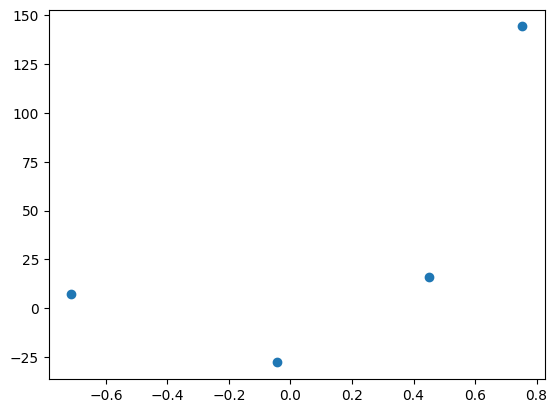

In [132]:
plt.scatter(X,y)

Lets apply `OLS`

In [133]:
from sklearn.linear_model import LinearRegression

In [134]:
lr = LinearRegression()

In [135]:
lr.fit(X,y)

LinearRegression()

In [136]:
lr.coef_,lr.intercept_

(array([78.35063668]), 26.15963284313262)

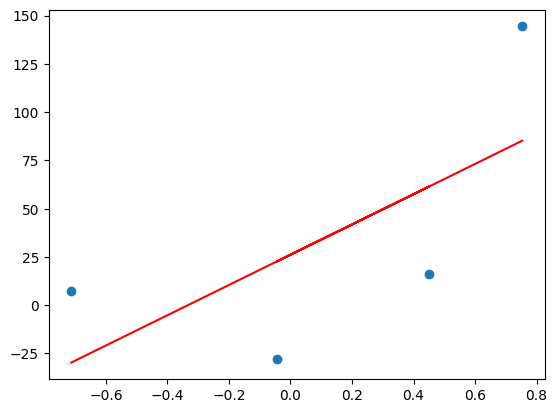

In [137]:
plt.scatter(X,y)
plt.plot(X,lr.predict(X),color="red")

Now apply `Gradient Descent` assuming slope is constant `m = 78.35`
and starting `b = 0`

In [138]:
y_pred = ((78.35*X)+0).reshape(4)


In [139]:
y_pred

array([-55.81580837,  35.39949674,  -3.48681619,  59.05759577])

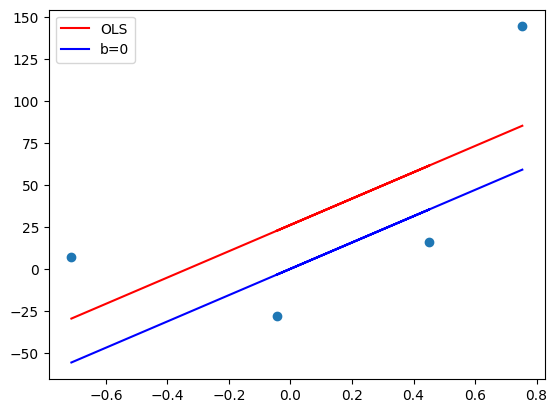

In [140]:
plt.scatter(X,y)
plt.plot(X,lr.predict(X),color="red",label='OLS')
plt.plot(X,y_pred,color="blue",label='b=0')
plt.legend()
plt.show()

In [141]:
# interation 1
m = 78.35
b=0
loss_slope = -2 * np.sum(y - m * X.ravel() -b)
loss_slope

-209.27763408209216

In [142]:
learning_rate = 0.1
step_size = loss_slope * learning_rate
step_size

-20.927763408209216

In [143]:
b = b - step_size
b

20.927763408209216

In [144]:
y_pred1 = ((78.35*X)+b).reshape(4)
y_pred1

array([-34.88804496,  56.32726015,  17.44094722,  79.98535918])

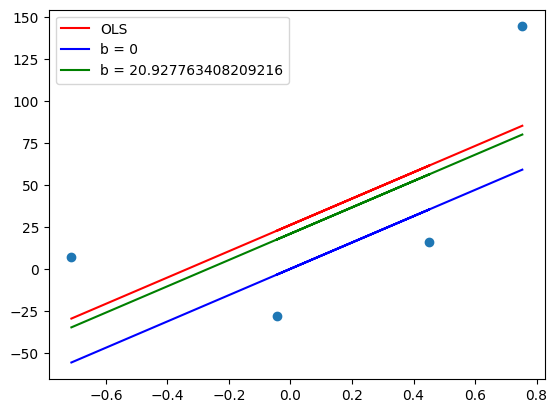

In [145]:
plt.scatter(X,y)
plt.plot(X,lr.predict(X),color="red",label='OLS')
plt.plot(X,y_pred,color="blue",label='b = 0')
plt.plot(X,y_pred1,color="green",label='b = {}'.format(b))
plt.legend()
plt.show()

In [146]:
# interation 2
loss_slope = -2 * np.sum(y - m * X.ravel() -b)
loss_slope

-41.85552681641843

In [147]:
step_size = loss_slope * learning_rate
step_size

-4.185552681641844

In [148]:
b2 = b - step_size
b2

25.11331608985106

In [149]:
y_pred2 = ((78.35*X)+b).reshape(4)
y_pred2

array([-34.88804496,  56.32726015,  17.44094722,  79.98535918])

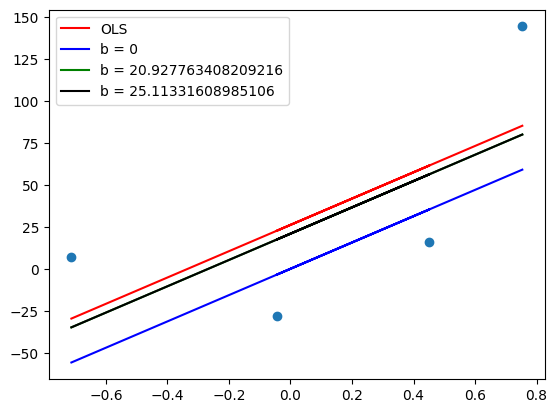

In [150]:
plt.scatter(X,y)
plt.plot(X,lr.predict(X),color="red",label='OLS')
plt.plot(X,y_pred,color="blue",label='b = 0')
plt.plot(X,y_pred1,color="green",label='b = {}'.format(b))
plt.plot(X,y_pred2,color="black",label='b = {}'.format(b2))
plt.legend()
plt.show()

In [151]:
# interation 3
loss_slope = -2 * np.sum(y - m * X.ravel() -b2)
loss_slope

-8.371105363283675

In [152]:
step_size = loss_slope * learning_rate
step_size

-0.8371105363283675

In [153]:
b3 = b2 - step_size
b3

25.95042662617943

In [154]:
y_pred3 = ((78.35*X)+b3).reshape(4)
y_pred3

array([-29.86538175,  61.34992337,  22.46361044,  85.00802239])

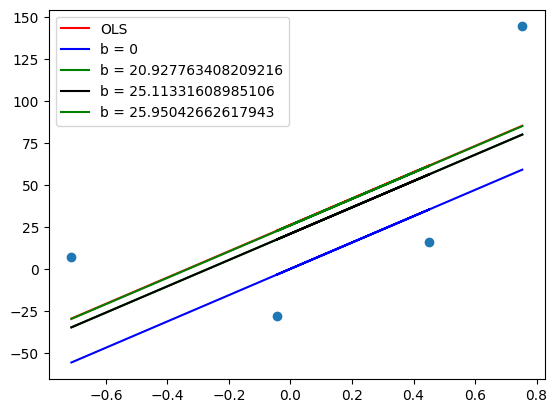

In [155]:
plt.scatter(X,y)
plt.plot(X,lr.predict(X),color="red",label='OLS')
plt.plot(X,y_pred,color="blue",label='b = 0')
plt.plot(X,y_pred1,color="green",label='b = {}'.format(b))
plt.plot(X,y_pred2,color="black",label='b = {}'.format(b2))
plt.plot(X,y_pred3,color="green",label='b = {}'.format(b3))
plt.legend()
plt.show()